In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tslearn.clustering import silhouette_score
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
from itertools import permutations
from itertools import product
from sklearn.metrics import confusion_matrix

c:\Users\Leo\.conda\envs\bigdata\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
campo3 = (6,0)
k3 = 4

campo4 = (2,0)
k4 = 2

campo6 = (6,0)
k6 = 2

with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)

with open('./pickles/newResa4.pickle', 'rb') as handle:
    newResa4 = pickle.load(handle)

with open('./pickles/newResa6.pickle', 'rb') as handle:
    newResa6 = pickle.load(handle)

with open('./pickles/kmeans_total_3_c_ndre'+str(k3)+'.pickle', 'rb') as handle:
    kmeans_total3 = pickle.load(handle)

with open('./pickles/kmeans_total_3_c_ndre'+str(k3)+'.pickle', 'rb') as handle:
    kmeans_total3_master = pickle.load(handle)

with open('./pickles/kmeans_total_4_c_ndre'+str(k4)+'.pickle', 'rb') as handle:
    kmeans_total4 = pickle.load(handle)

with open('./pickles/kmeans_total_4_c_ndre'+str(k4)+'.pickle', 'rb') as handle:
    kmeans_total4_master = pickle.load(handle)

with open('./pickles/kmeans_total_6_c_ndre'+str(k6)+'.pickle', 'rb') as handle:
    kmeans_total6 = pickle.load(handle)

with open('./pickles/kmeans_total_6_c_ndre'+str(k6)+'.pickle', 'rb') as handle:
    kmeans_total6_master = pickle.load(handle)

In [3]:

newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]
newResa4 = newResa4[(newResa4<=11000) & (newResa4 >= 4000)]
newResa6 = newResa6[(newResa6<=11000) & (newResa6 >= 4000)]

In [4]:
num_classi = list(range(2,7))
num_cluster = k4
campo = 4
campoCoord = campo4
kmeans_select = kmeans_total4
newResa = newResa4

In [5]:
def split_resa(k,resa):
    percentile_value = 1/k
    label = np.ndarray([resa.shape[0]],dtype=int)
    label[:] = int(-1)

    for i in range(0,k):
        label[(resa <= np.quantile(resa,q=(percentile_value*(i+1)))) & (resa >= np.quantile(resa,q=(percentile_value*i)))] = i

    return label


In [6]:
def removeTexts(xlim=np.Inf,ylim=np.Inf):
    axis = plt.gca()
    for text in axis.texts:
        if text.get_position()[0] > xlim or text.get_position()[1] > ylim: #check if x is more than 3
            text.remove()


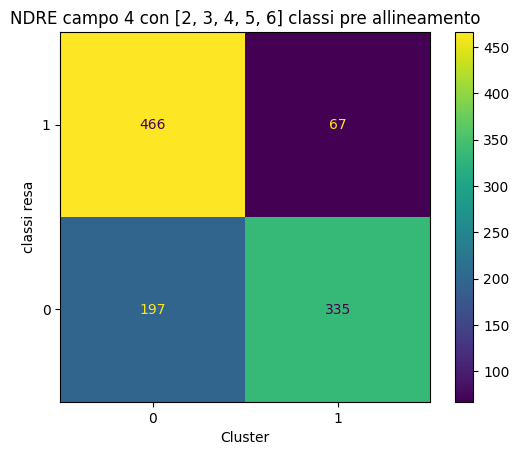

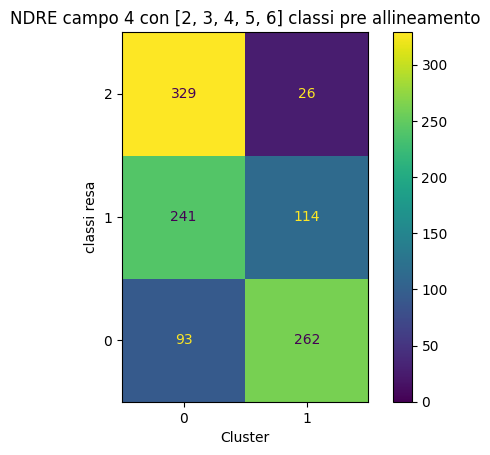

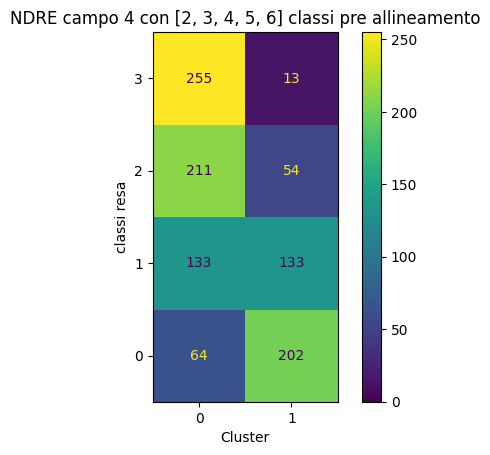

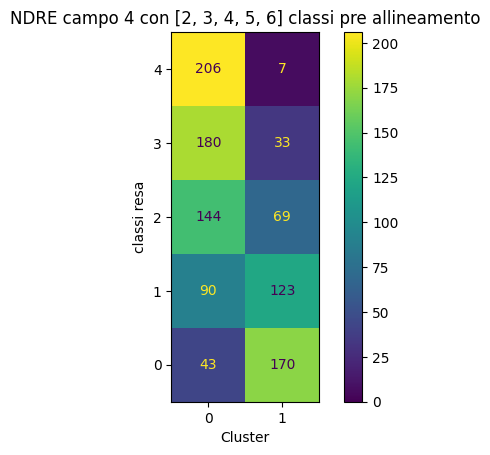

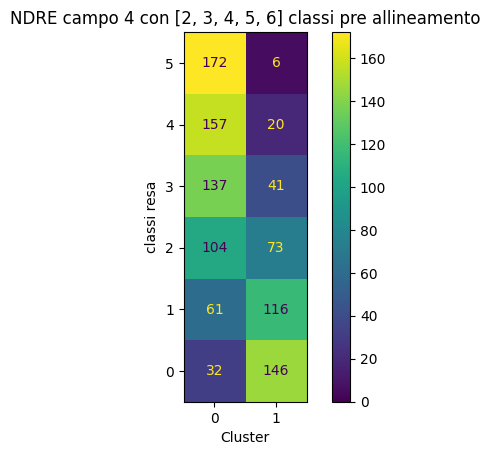

In [7]:
labels = []
for classe in num_classi:
    label_div = split_resa(classe,newResa)
    labels.append(label_div)
    ConfusionMatrixDisplay.from_predictions(label_div,kmeans_select[campoCoord])
    xdiplsay = num_cluster-0.5
    ydislpay = classe-0.5
    removeTexts(xlim=xdiplsay,ylim=ydislpay)
    plt.title('NDRE campo '+str(campo)+' con '+str(num_classi)+' classi pre allineamento')
    plt.xlabel('Cluster')
    plt.ylabel('classi resa')
    plt.ylim([-0.5,ydislpay])
    plt.xlim([-0.5,xdiplsay])
    plt.show()

In [8]:
#print(list(product(np.unique(label),repeat=len(np.unique(kmeans_select[campoCoord])))))
#print(np.unique(label))
#print(len(np.unique(kmeans_select[campoCoord])))

In [9]:
def best_cluster(matrice,cluster,label):
    a = np.arange(matrice.shape[0])
    permutation = list(product(np.unique(label),repeat=len(np.unique(cluster))))
    obiettivo = {'max': 0,
                'perm':[]}

    for perm in permutation:
        somma = 0
        for elem,index in zip(perm,range(matrice.shape[0])):
            somma += matrice[index,elem]
        if(somma > obiettivo['max']):
            obiettivo['max'] = somma
            obiettivo['perm'] = perm

    test_map = {}
    for pippo,pluto in zip(obiettivo['perm'],range(matrice.shape[0])):
        test_map[pluto] = pippo
    return test_map


In [10]:
def removeRow(num_classi,num_cluster,confusion):
    if num_classi < num_cluster: #rimuove le righe
        new_confusion = np.zeros((1,confusion.shape[1]),dtype=np.int16)
        for i in range(confusion.shape[0]):
            if np.sum(confusion[i,:]) != 0:
                new_confusion = np.concatenate((new_confusion,[confusion[i,:]]),axis = 0)
        new_confusion = new_confusion[1:,:]
        return new_confusion
    else:
        print("no need to remove rows")
        return confusion

In [11]:
cluster_class_mappings = []
matrice_confusione = []

for classe,label in zip(num_classi,labels):
    cluster_class_mapping_new = {}
    matrice_elem_new = np.ndarray((len(np.unique(kmeans_select[campoCoord])),classe))
    
    matrice_confusione_new = confusion_matrix(label,kmeans_select[campoCoord])
    matrice_confusione_new = removeRow(classe,num_cluster,matrice_confusione_new)
    
    for kmean in range(0,num_cluster):
        matrice_elem_new[kmean,:] = matrice_confusione_new[:,kmean]

    cluster_class_mapping_new = best_cluster(matrice_elem_new,kmeans_select[campoCoord],label)
    cluster_class_mappings.append(cluster_class_mapping_new)
    matrice_confusione.append(matrice_confusione_new)

no need to remove rows
no need to remove rows
no need to remove rows
no need to remove rows
no need to remove rows


In [12]:
print(np.unique(kmeans_select[campoCoord],return_counts=True))
print(cluster_class_mappings)

(array([0, 1], dtype=int64), array([663, 402], dtype=int64))
[{0: 1, 1: 0}, {0: 2, 1: 0}, {0: 3, 1: 0}, {0: 4, 1: 0}, {0: 5, 1: 0}]


In [13]:
differences = []
for mapping in cluster_class_mappings:
    difference_new = pd.DataFrame(data=[],columns=['num_cluster','num_class'])
    for i in range(len(np.unique(kmeans_select[campoCoord]))):
        if(i != mapping[i]):
            new_row = pd.Series({'num_cluster': i, 'num_class': mapping[i]})
            difference_new = pd.concat([difference_new,new_row.to_frame().T],ignore_index=True)
    differences.append(difference_new)

In [14]:
for diff in differences:
    print(diff)

  num_cluster num_class
0           0         1
1           1         0
  num_cluster num_class
0           0         2
1           1         0
  num_cluster num_class
0           0         3
1           1         0
  num_cluster num_class
0           0         4
1           1         0
  num_cluster num_class
0           0         5
1           1         0


In [15]:
kmeans_select_multi = []

for difference in differences:
    kmeans_select_new = np.ndarray.copy(kmeans_select[campoCoord])
    indici = []
    for a in difference['num_cluster']:
        indici.append([
        index for index in range(len(kmeans_select_new))
        if kmeans_select_new[index] == a
    ])
    for ind,true_value in zip(indici,difference['num_class']):
        kmeans_select_new[ind] = true_value
    kmeans_select_multi.append(kmeans_select_new)

In [16]:
#cluster_class_mapping_test = {}
#for classe,label in zip(num_classi,labels):
#    matrice_elementi = np.ndarray((len(np.unique(kmeans_select[campoCoord])),classe))
#    
#    for kmean,position in zip(np.unique(kmeans_select[campoCoord]),range(len(np.unique(kmeans_select[campoCoord])))):
#    
#        cluster_classes = label[kmeans_select[campoCoord] == kmean]
#        unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
#        print(len(class_counts))
#        matrice_elementi[position,:] = class_counts
#        
#    cluster_class_mapping_test = best_cluster(matrice_elementi,kmeans_select[campoCoord],label)

[0 1]
[0 1]


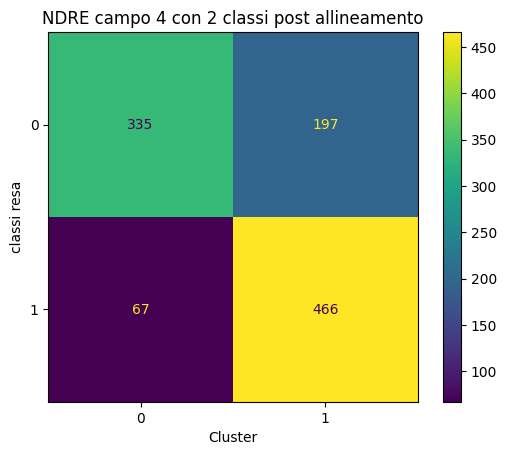

[0 1 2]
[0 2]


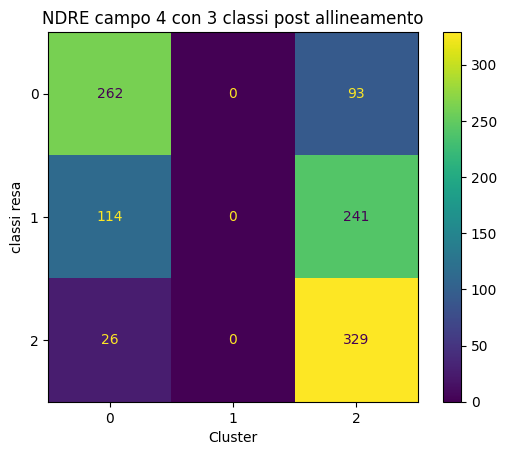

[0 1 2 3]
[0 3]


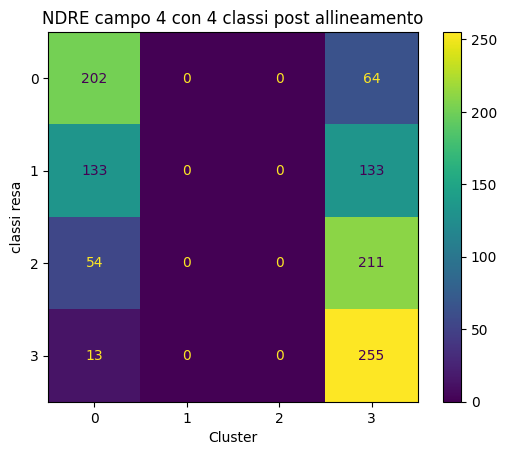

[0 1 2 3 4]
[0 4]


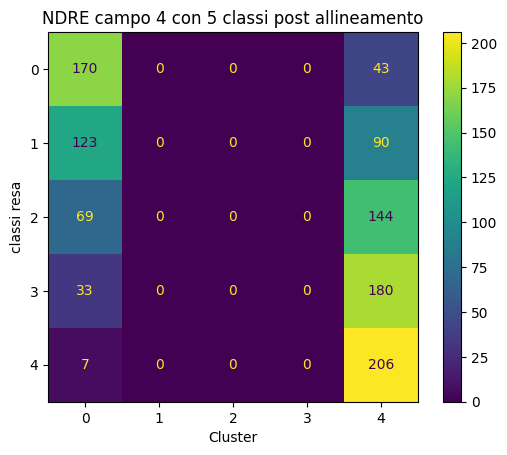

[0 1 2 3 4 5]
[0 5]


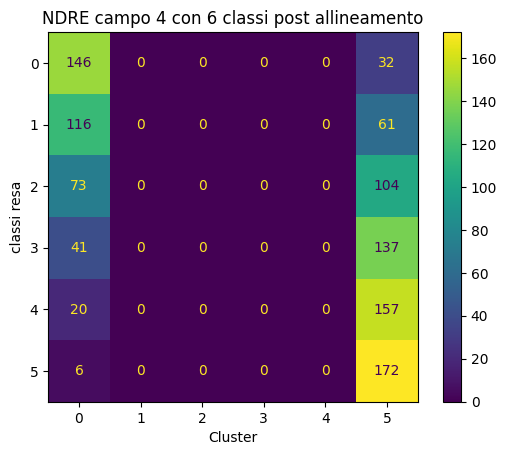

In [17]:
for label,classe,kmeans_sel in zip(labels,num_classi,kmeans_select_multi):
    print(np.unique(label))
    print(np.unique(kmeans_sel))
    ConfusionMatrixDisplay.from_predictions(label,kmeans_sel)

    #removeTexts(xlim=5)
    plt.title('NDRE campo '+str(campo)+' con '+str(classe)+' classi post allineamento')
    plt.xlabel('Cluster')
    plt.ylabel('classi resa')
    plt.show()

In [18]:
for label,classe,kmeans_sel in zip(labels,num_classi,kmeans_select_multi):
    accuracy = accuracy_score(label,kmeans_sel)
    precision = precision_score(label,kmeans_sel,average='macro')
    recall = recall_score(label,kmeans_sel,average= 'macro')
    print("precision ",precision)
    print("recall ",recall,'\n')

precision  0.7680995475113122
recall  0.7519978416961729 

precision  0.38265685148916057
recall  0.5549295774647888 

precision  0.22177573670110984
recall  0.4277227583885086 

precision  0.1467188942166993
recall  0.3530516431924883 

precision  0.1037684878773553
recall  0.29775280898876405 



c:\Users\Leo\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Leo\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Leo\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Leo\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_cl

In [19]:
for label,kmeans_sel in zip(labels,kmeans_select_multi):
    accuracy = accuracy_score(label,kmeans_sel)
    precision = precision_score(label,kmeans_sel,average='macro')
    recall = recall_score(label,kmeans_sel,average='macro')
    precision_skew = precision[precision !=0].mean()
    recall_skew = recall[recall !=0].mean()
    print("accuratezza " ,accuracy)
    print("precision ",precision)
    print("recall ",recall)

    print("precision skewed",precision_skew)
    print("recall skewed",recall_skew,'\n')



accuratezza  0.752112676056338
precision  0.7680995475113122
recall  0.7519978416961729
precision skewed 0.7680995475113122
recall skewed 0.7519978416961729 

accuratezza  0.5549295774647888
precision  0.38265685148916057
recall  0.5549295774647888
precision skewed 0.38265685148916057
recall skewed 0.5549295774647888 

accuratezza  0.4291079812206573
precision  0.22177573670110984
recall  0.4277227583885086
precision skewed 0.22177573670110984
recall skewed 0.4277227583885086 

accuratezza  0.3530516431924883
precision  0.1467188942166993
recall  0.3530516431924883
precision skewed 0.1467188942166993
recall skewed 0.3530516431924883 

accuratezza  0.29859154929577464
precision  0.1037684878773553
recall  0.29775280898876405
precision skewed 0.1037684878773553
recall skewed 0.29775280898876405 



c:\Users\Leo\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Leo\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Leo\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Leo\.conda\envs\bigdata\lib\site-packages\sklearn\metrics\_cl

In [20]:
# Nuova matrice di confusione
confusion = confusion_matrix(label,kmeans_select[campoCoord])
#new_confusion = np.concatenate((confusion[:,0:2],confusion[:,3:5]),axis=1)
moreRow = -1
print(confusion)
selected = []
if num_classi > num_cluster: #rimuove la colonna nulla

    moreRow = 0
    new_confusion = np.zeros((confusion.shape[1],1),dtype=np.int16)

    for i in range(confusion.shape[1]):
        if np.sum(confusion[:,i]) != 0:
            selected.append(str(i)) 
            new_confusion = np.concatenate((new_confusion,confusion[:,i].reshape(confusion.shape[1],1)),axis = 1)

    new_confusion = new_confusion[:,1:]
    
    print(new_confusion)
    print(selected)



[[ 32 146   0   0   0   0]
 [ 61 116   0   0   0   0]
 [104  73   0   0   0   0]
 [137  41   0   0   0   0]
 [157  20   0   0   0   0]
 [172   6   0   0   0   0]]


TypeError: '>' not supported between instances of 'list' and 'int'

In [21]:
#print(['']+list([str(x) for x in range(0,new_confusion.shape[1])]))

In [22]:
if moreRow != -1: 
    fig, ax = plt.subplots()
    plt.rc('font', size=10)
    image = ax.imshow(new_confusion[:,:],)

    for i in range(0,new_confusion.shape[0]):
        for j in range(0,new_confusion.shape[1]):
            c = np.round(new_confusion[i,j],decimals=3)
            ax.text(j, i, str(c), va='center', ha='center')

    plt.colorbar(image)
    
    ax.set_xticks([-0.5]+list(range(0,new_confusion.shape[1])))
    ax.set_xticklabels(['']+list([str(x) for x in range(0,new_confusion.shape[1])]))

    ax.set_yticks([-0.5]+list(range(0,new_confusion.shape[0])))
    ax.set_yticklabels(['']+list([str(x) for x in range(0,new_confusion.shape[0])]))
    
    if moreRow == 0:
        ax.set_xticklabels(['']+selected)
    elif moreRow == 1:
        ax.set_yticklabels(['']+selected)
    plt.title('NDRE campo '+str(campo)+' con '+str(num_classi)+' classi post allineamento')
    plt.show()